# Anxiety and Mental Health Overview

Javier Godos de la Puente

The following analysis is a basic overview on anxiety obtained from a Mental Health Dataset seen in [Kaggle](https://www.kaggle.com/datasets/natezhang123/social-anxiety-dataset/data)
and obtained through the Department Of Health in the Government of Western Australia.

The type of Anxiety represented here is concretely Social Anxiety, which reflects

Data has gone already through a cleanup process in order to be usable for educational and research purposes and in no way any results of the
studies done with it can be used for diagnosis.

### 1. Global data overview

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec
import pandasql as sqldf

Let's start by importing the dataset and analyzing globally the data distribution of the variables.

In [3]:
data = pd.read_csv("./Data/enhanced_anxiety_dataset.csv")
data.head()
data.shape

(11000, 19)

In the columns we can view many of the different factors that can lead to anxiety such as stress or factors that might reduce said levels
such as monthly therapy sessions.

Let's view a preliminary distribution of data by category.

In [4]:
data.dtypes

Age                                    int64
Gender                                object
Occupation                            object
Sleep Hours                          float64
Physical Activity (hrs/week)         float64
Caffeine Intake (mg/day)               int64
Alcohol Consumption (drinks/week)      int64
Smoking                               object
Family History of Anxiety             object
Stress Level (1-10)                    int64
Heart Rate (bpm)                       int64
Breathing Rate (breaths/min)           int64
Sweating Level (1-5)                   int64
Dizziness                             object
Medication                            object
Therapy Sessions (per month)           int64
Recent Major Life Event               object
Diet Quality (1-10)                    int64
Anxiety Level (1-10)                 float64
dtype: object

In [5]:
### Preview possible values in the columns

for col in list(data.columns):
    print("Values in ", col, " column: ", data[col].unique())

Values in  Age  column:  [29 46 64 20 49 53 54 51 59 30 38 45 31 44 56 61 57 26 41 34 62 43 40 27
 63 32 52 19 23 24 39 36 35 22 60 47 55 58 18 25 48 50 42 33 28 21 37]
Values in  Gender  column:  ['Female' 'Other' 'Male']
Values in  Occupation  column:  ['Artist' 'Nurse' 'Other' 'Scientist' 'Lawyer' 'Teacher' 'Doctor'
 'Musician' 'Student' 'Engineer' 'Freelancer' 'Chef' 'Athlete']
Values in  Sleep Hours  column:  [ 6.   6.2  5.   5.8  8.2  6.4  7.9  6.3  6.6  5.1  8.   6.9  7.5  6.1
  7.7  6.7  8.4  4.5  4.9  4.   7.1  5.6  2.6  6.8  4.6  5.2  7.   8.5
  8.6  8.7  7.6  5.9  7.2  6.5  8.3  4.1  8.1  7.8  5.3  9.4  4.4  7.4
  5.5  9.2  3.9  8.9  8.8  5.7  9.3  9.   5.4  4.8  7.3  4.3  3.8  3.4
  4.7  3.3  3.7  3.1  9.1  9.5  3.6  4.2  9.8  2.5  9.9  2.9 10.3  3.2
  9.7  3.5  9.6  3.  11.3 10.  10.4 10.2 10.1  2.3  2.7 11. ]
Values in  Physical Activity (hrs/week)  column:  [ 2.7  5.7  3.7  2.8  2.3  6.5  2.5  5.5  3.1  4.8  5.4  7.5  0.1  3.6
  2.   3.5  1.   5.3  0.3  1.8  7.4  3.   5.

Let's observe the distribution of data by Gender and Age to check for any biases.

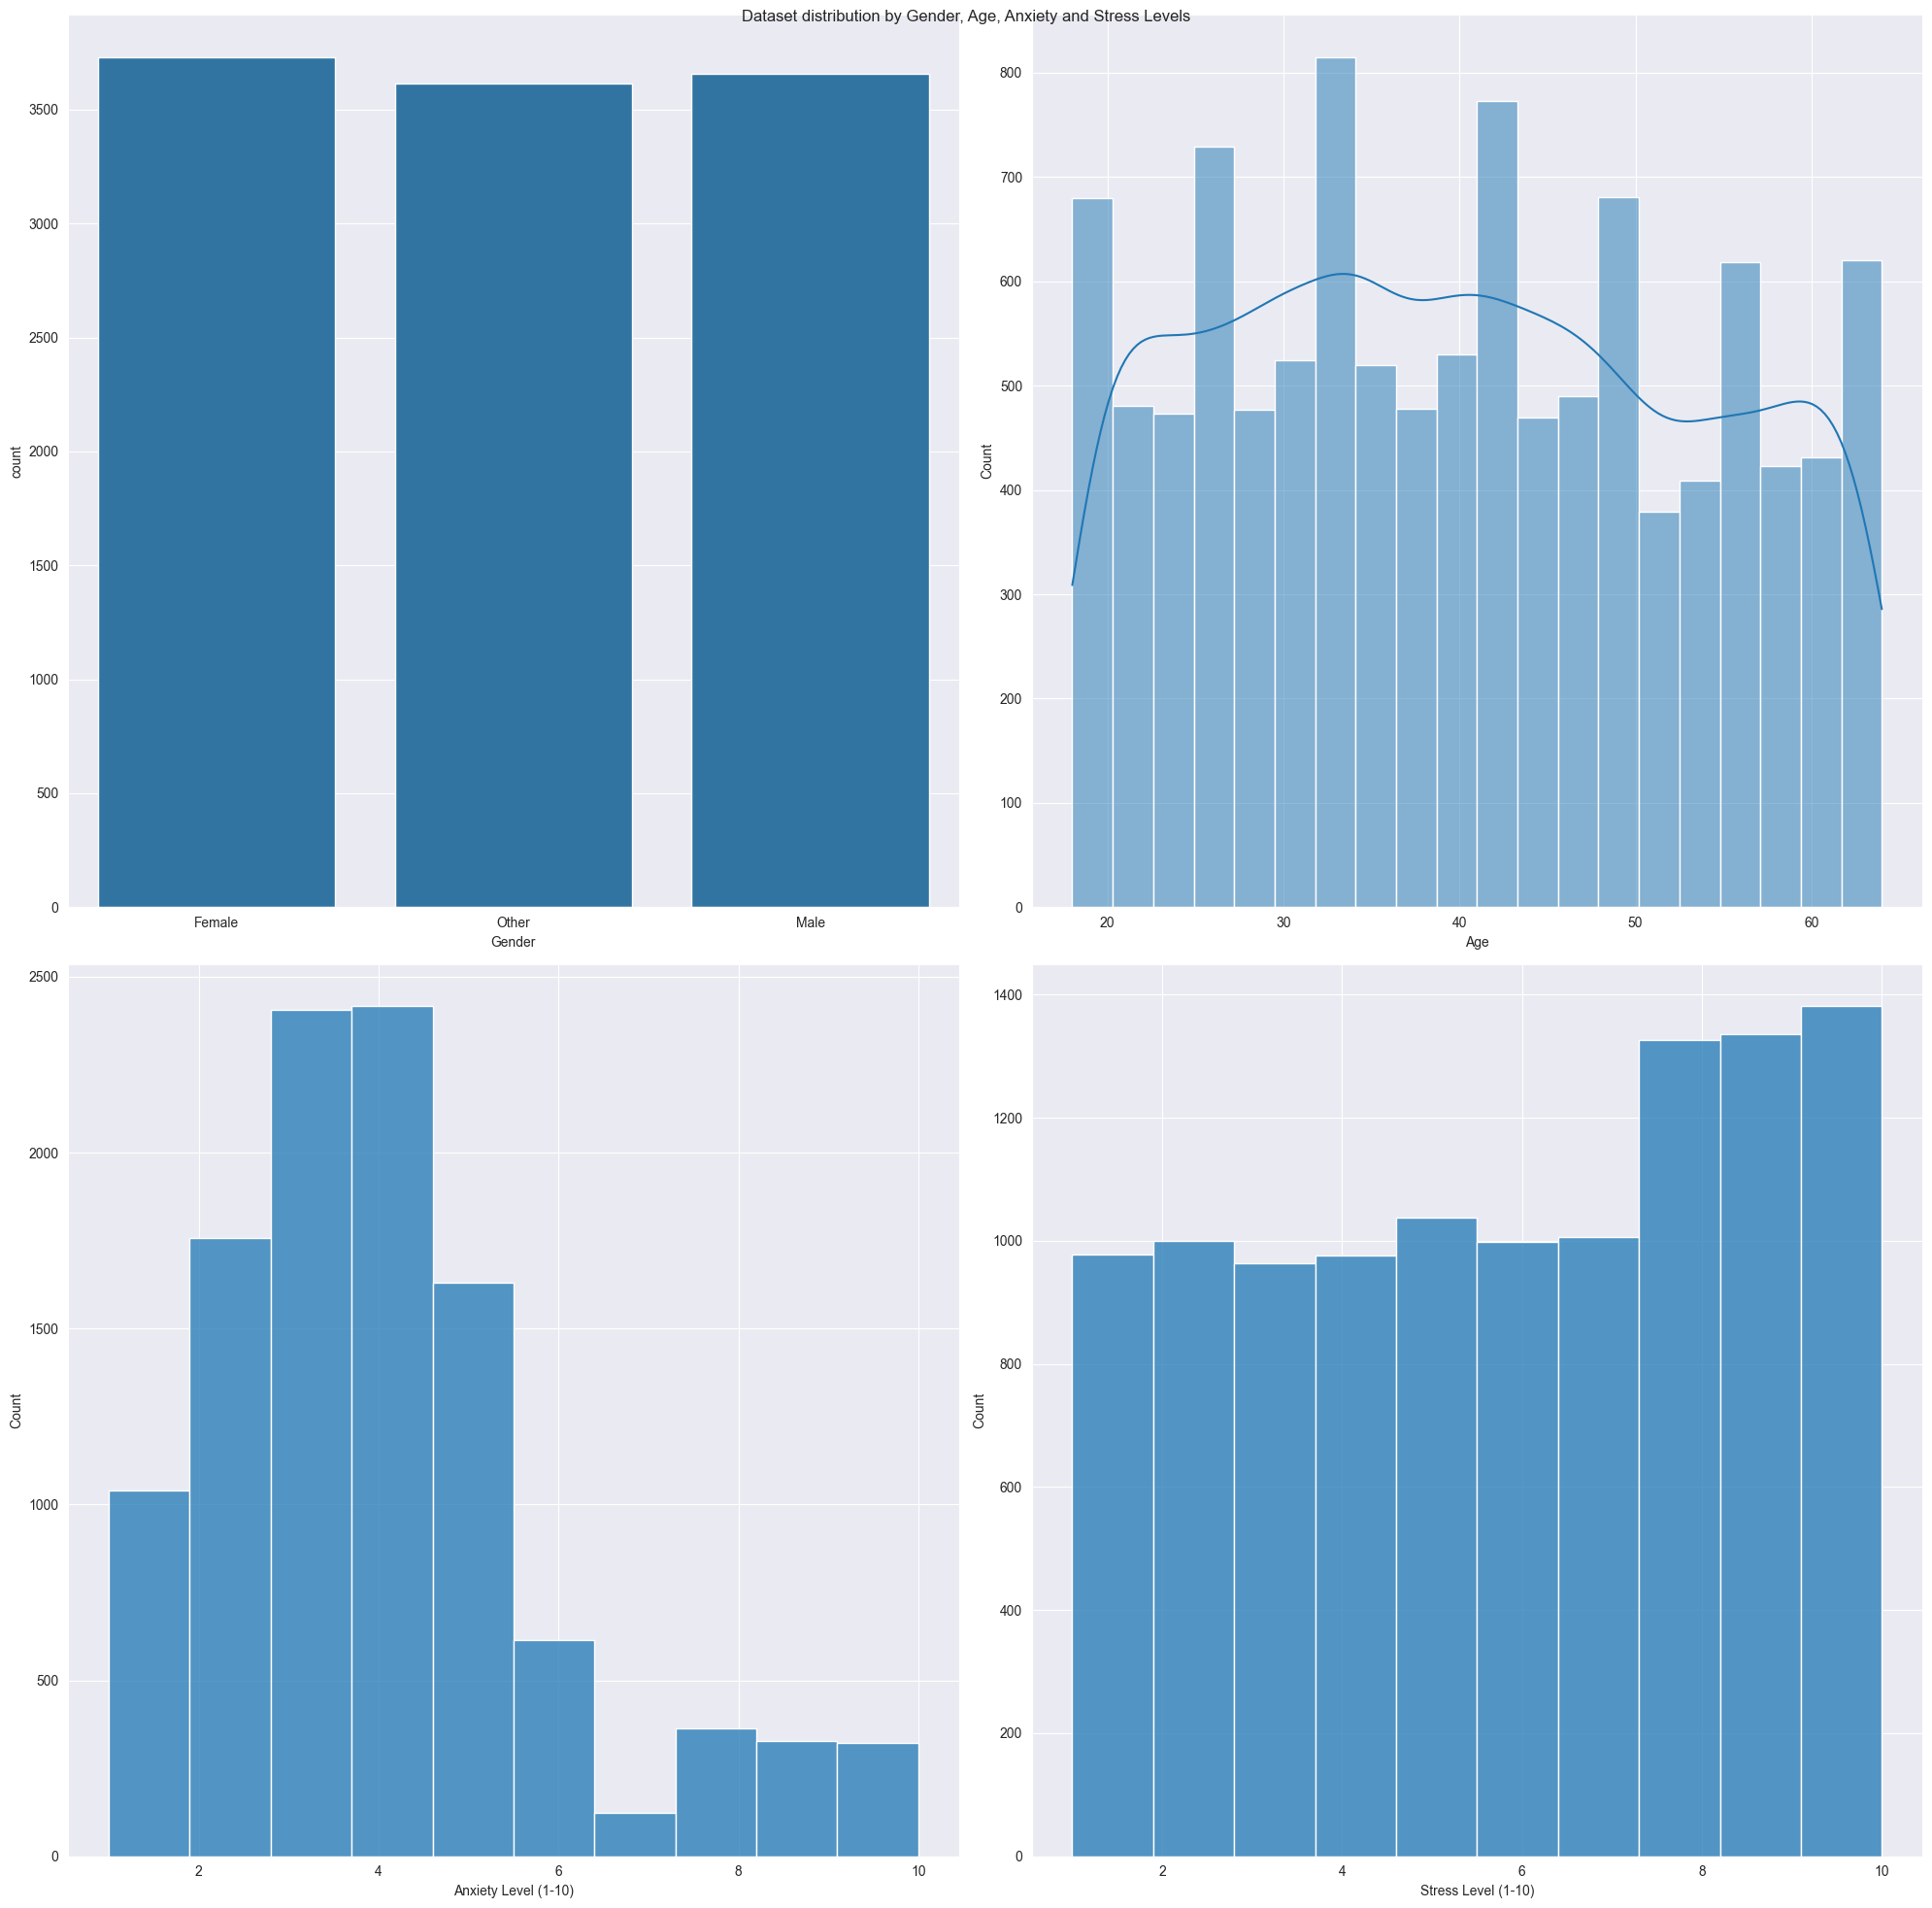

In [52]:
plt.figure(figsize=(20, 20), tight_layout=True)
plt.suptitle("Dataset distribution by Gender, Age, Anxiety and Stress Levels")
plt.subplot(2, 2, 1)
sns.countplot(data, x = 'Gender')

plt.subplot(2, 2, 2)
sns.histplot(data, x = 'Age', bins = 20, kde = True) #Kernel density function used to better understand age distribution under the histogram

plt.subplot(2, 2, 3)
sns.histplot(data, x = 'Anxiety Level (1-10)', bins = 10)

plt.subplot(2, 2, 4)
sns.histplot(data, x = 'Stress Level (1-10)', bins = 10)
plt.show() # Sample seems distributed evenly by age and gender.

Let's take a smaller random sample for a representative purposes. For 11000 people, a good sample size representative of the population according to [a Sample Size calculator provided by Google](https://docs.google.com/spreadsheets/d/15GRq7bMlsjPakqtjxjbcbyqC6Dg4EEXmq7-ShYCg9Jg/edit?gid=0#gid=0) is 372 (approximately) for a 95% confidence interval with 5% margin of error, or about 3.4%.

In [10]:
data_sample = data.sample(frac = 0.034, random_state = 42) #Add data seed for data reproducibility

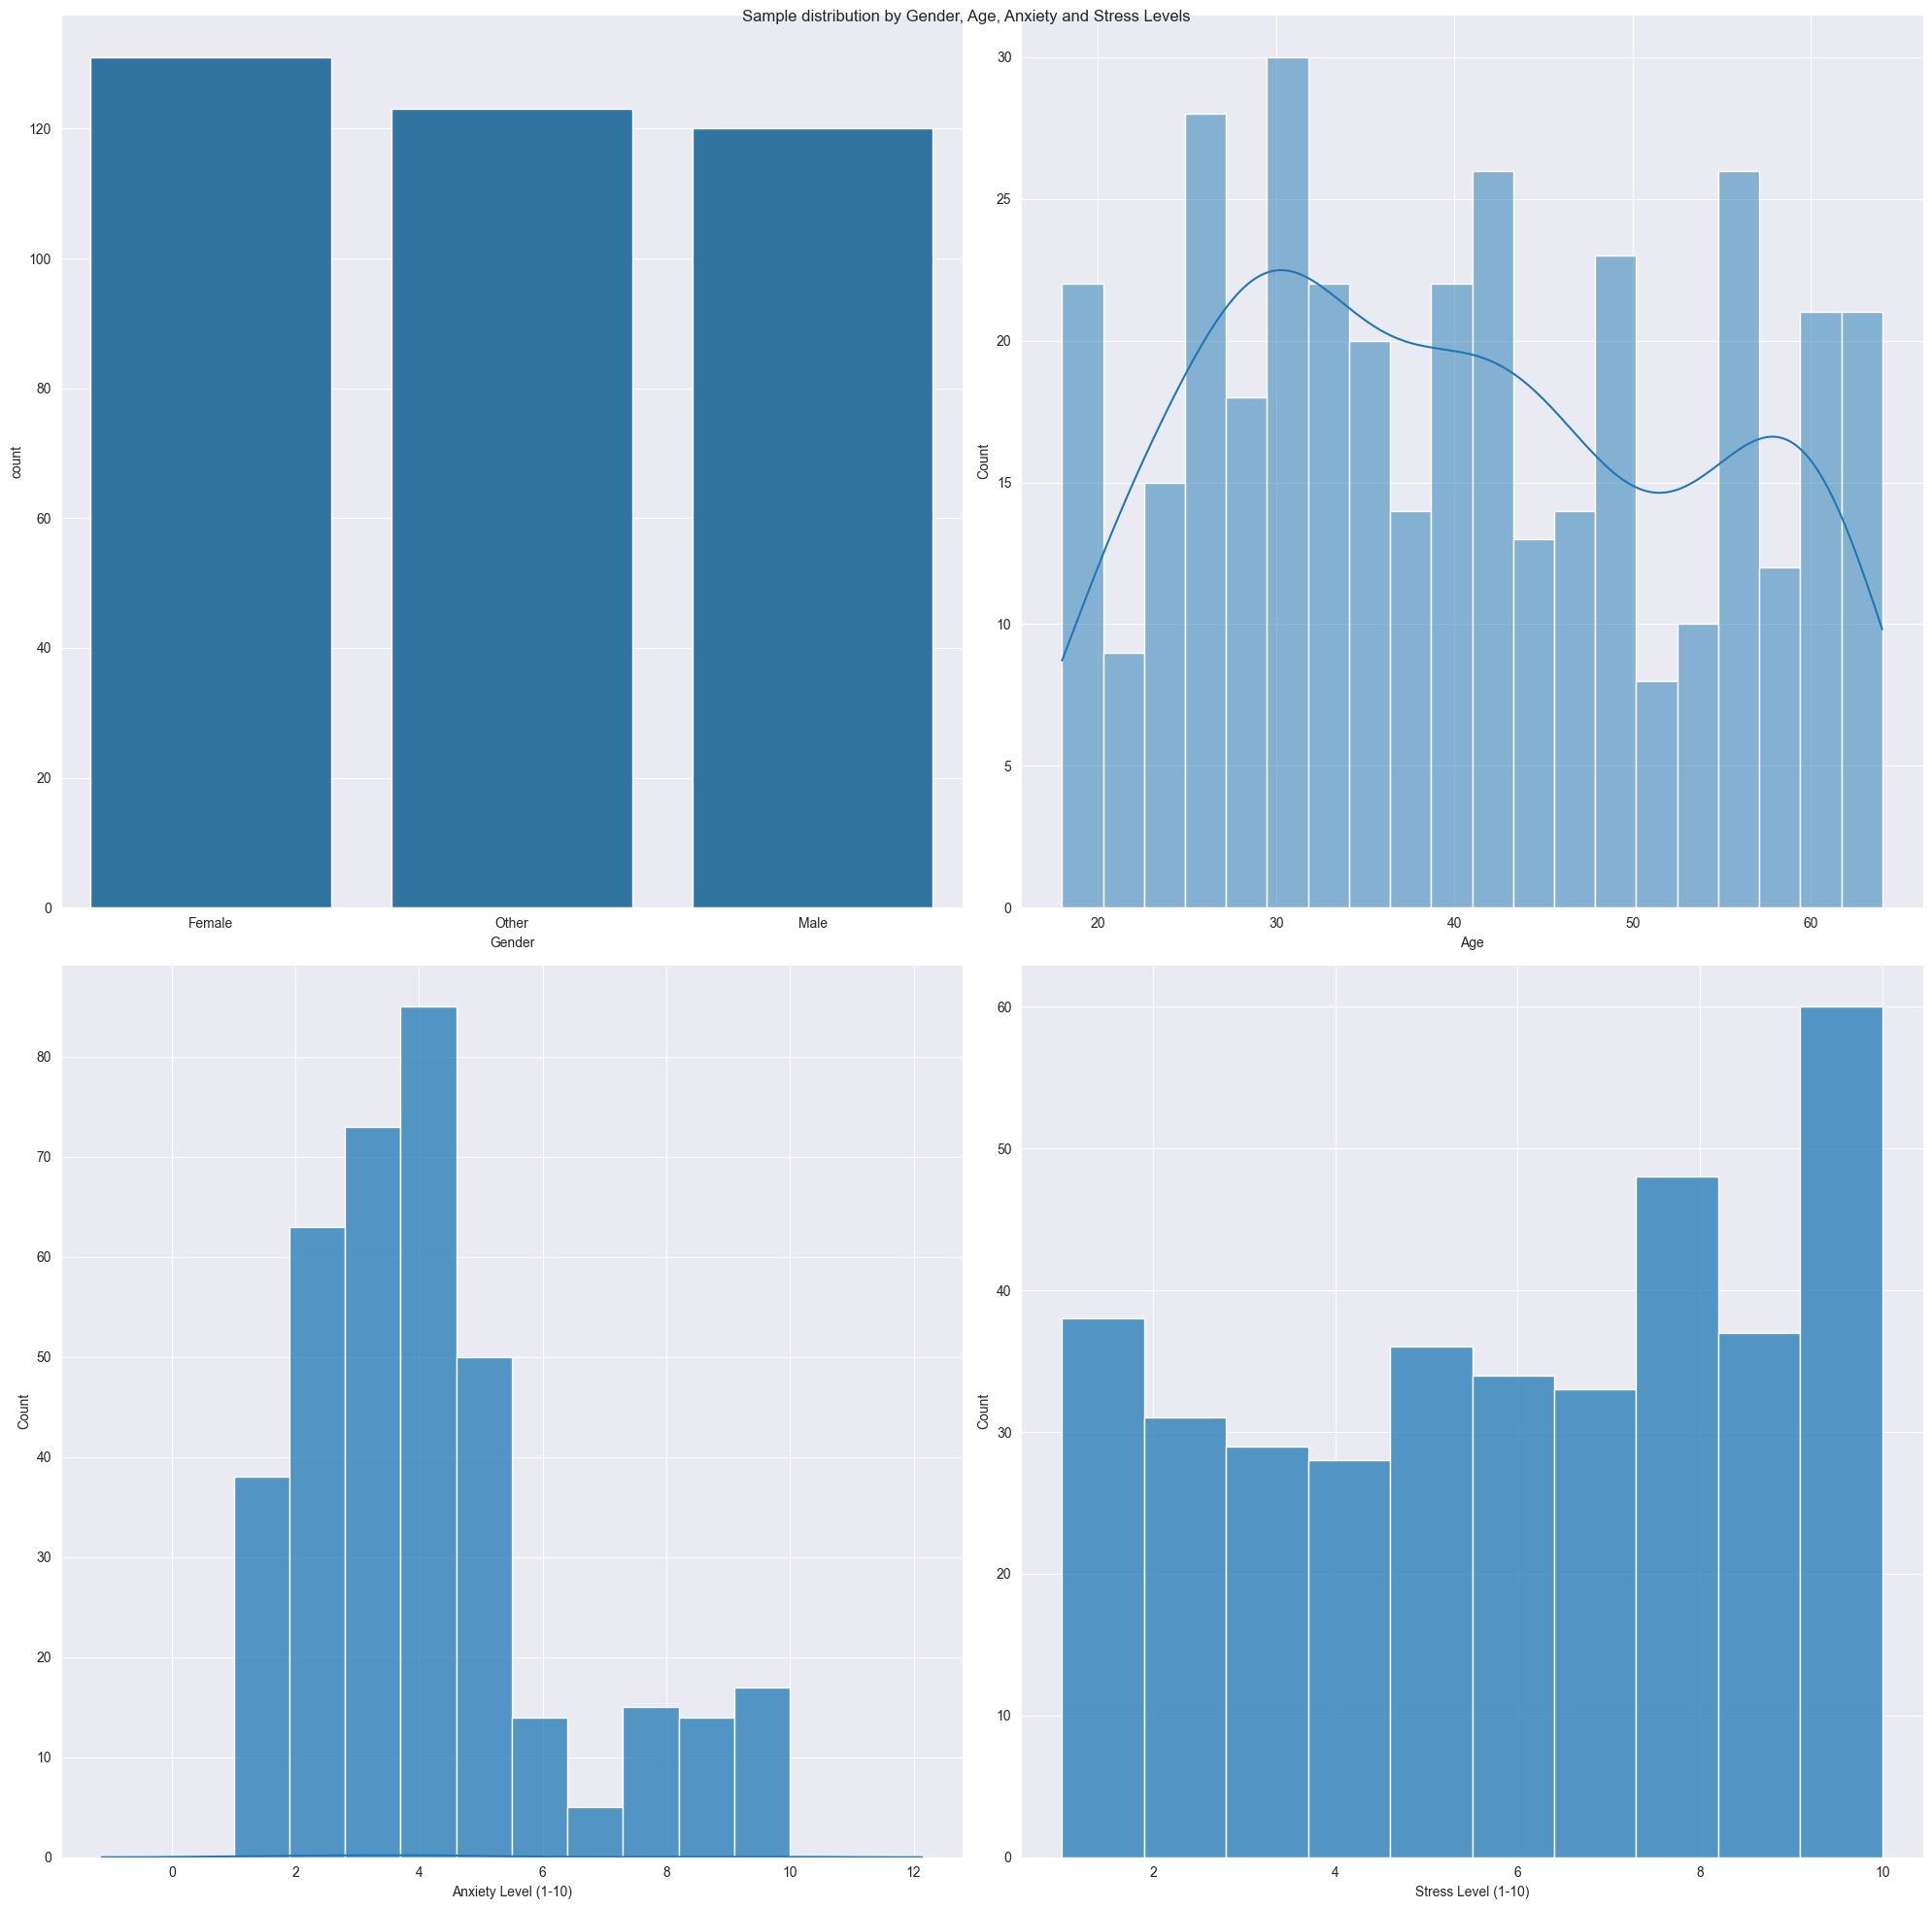

In [51]:
plt.figure(figsize=(20, 20), tight_layout=True)
plt.suptitle("Sample distribution by Gender, Age, Anxiety and Stress Levels")
plt.subplot(2, 2, 1)
sns.countplot(data_sample, x = 'Gender')

plt.subplot(2, 2, 2)
sns.histplot(data_sample, x = 'Age', bins = 20, kde = True)

plt.subplot(2, 2, 3)
sns.histplot(data_sample, x = 'Anxiety Level (1-10)', bins = 10)
sns.kdeplot(data_sample, x = 'Anxiety Level (1-10)')

plt.subplot(2, 2, 4)
sns.histplot(data_sample, x = 'Stress Level (1-10)', bins = 10)
plt.show() # Sample seems distributed evenly by age and gender.

Let's see if we can view some trends with some scatterplots. Let's start by seeing if there is gender bias when it comes to Anxiety Levels and Caffeine Intake.

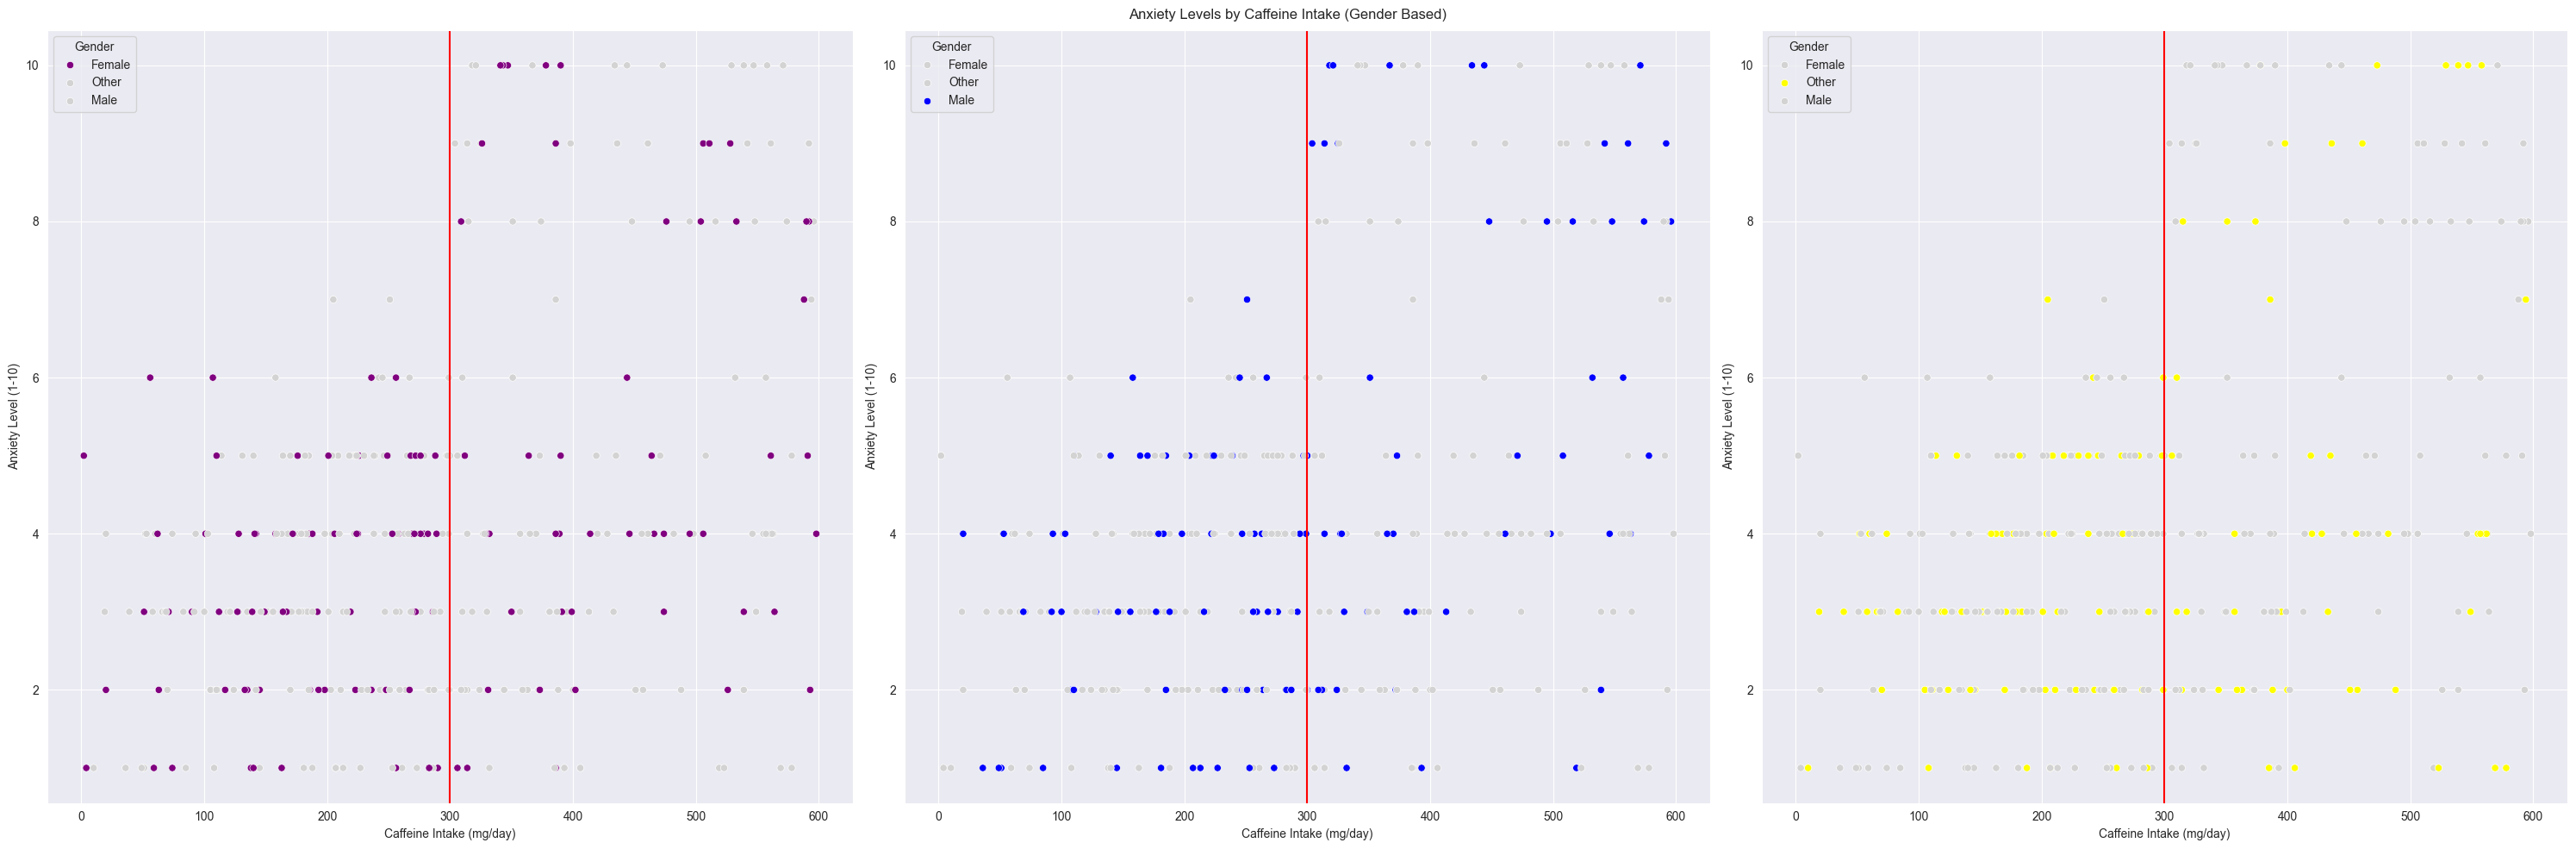

In [70]:
# plt.figure(figsize=(10, 10), tight_layout=True)
color_1 = {'Female': 'purple', 'Male': 'lightgrey', 'Other': 'lightgrey'}
color_2 = {'Female': 'lightgrey', 'Male': 'blue', 'Other': 'lightgrey'}
color_3 = {'Female': 'lightgrey', 'Male': 'lightgrey', 'Other': 'yellow'}

plt.figure(figsize=(30, 10), tight_layout=True)
plt.suptitle("Anxiety Levels by Caffeine Intake (Gender Based)")
plt.subplot(1, 3, 1)
sns.scatterplot(data = data_sample, x =  'Caffeine Intake (mg/day)', y = 'Anxiety Level (1-10)', hue = 'Gender', palette = color_1)
plt.axvline(x = 300, color = "red")
plt.subplot(1, 3, 2)
sns.scatterplot(data = data_sample, x =  'Caffeine Intake (mg/day)', y = 'Anxiety Level (1-10)', hue = 'Gender', palette = color_2)
plt.axvline(x = 300, color = "red")
plt.subplot(1, 3, 3)
sns.scatterplot(data = data_sample, x =  'Caffeine Intake (mg/day)', y = 'Anxiety Level (1-10)', hue = 'Gender', palette = color_3)
plt.axvline(x = 300, color = "red")

plt.show() # Sample seems distributed evenly by age and gender.

There doesn't seem to be straight relationship between anxiety levels and gender but, for all groups, higher levels of anxiety (8, 9 and 10) seem to be reported when the 300 mg/day caffeine intake is surpassed. Let's view some other relationships
regarding stress and anxiety levels as well as hours of sleep.

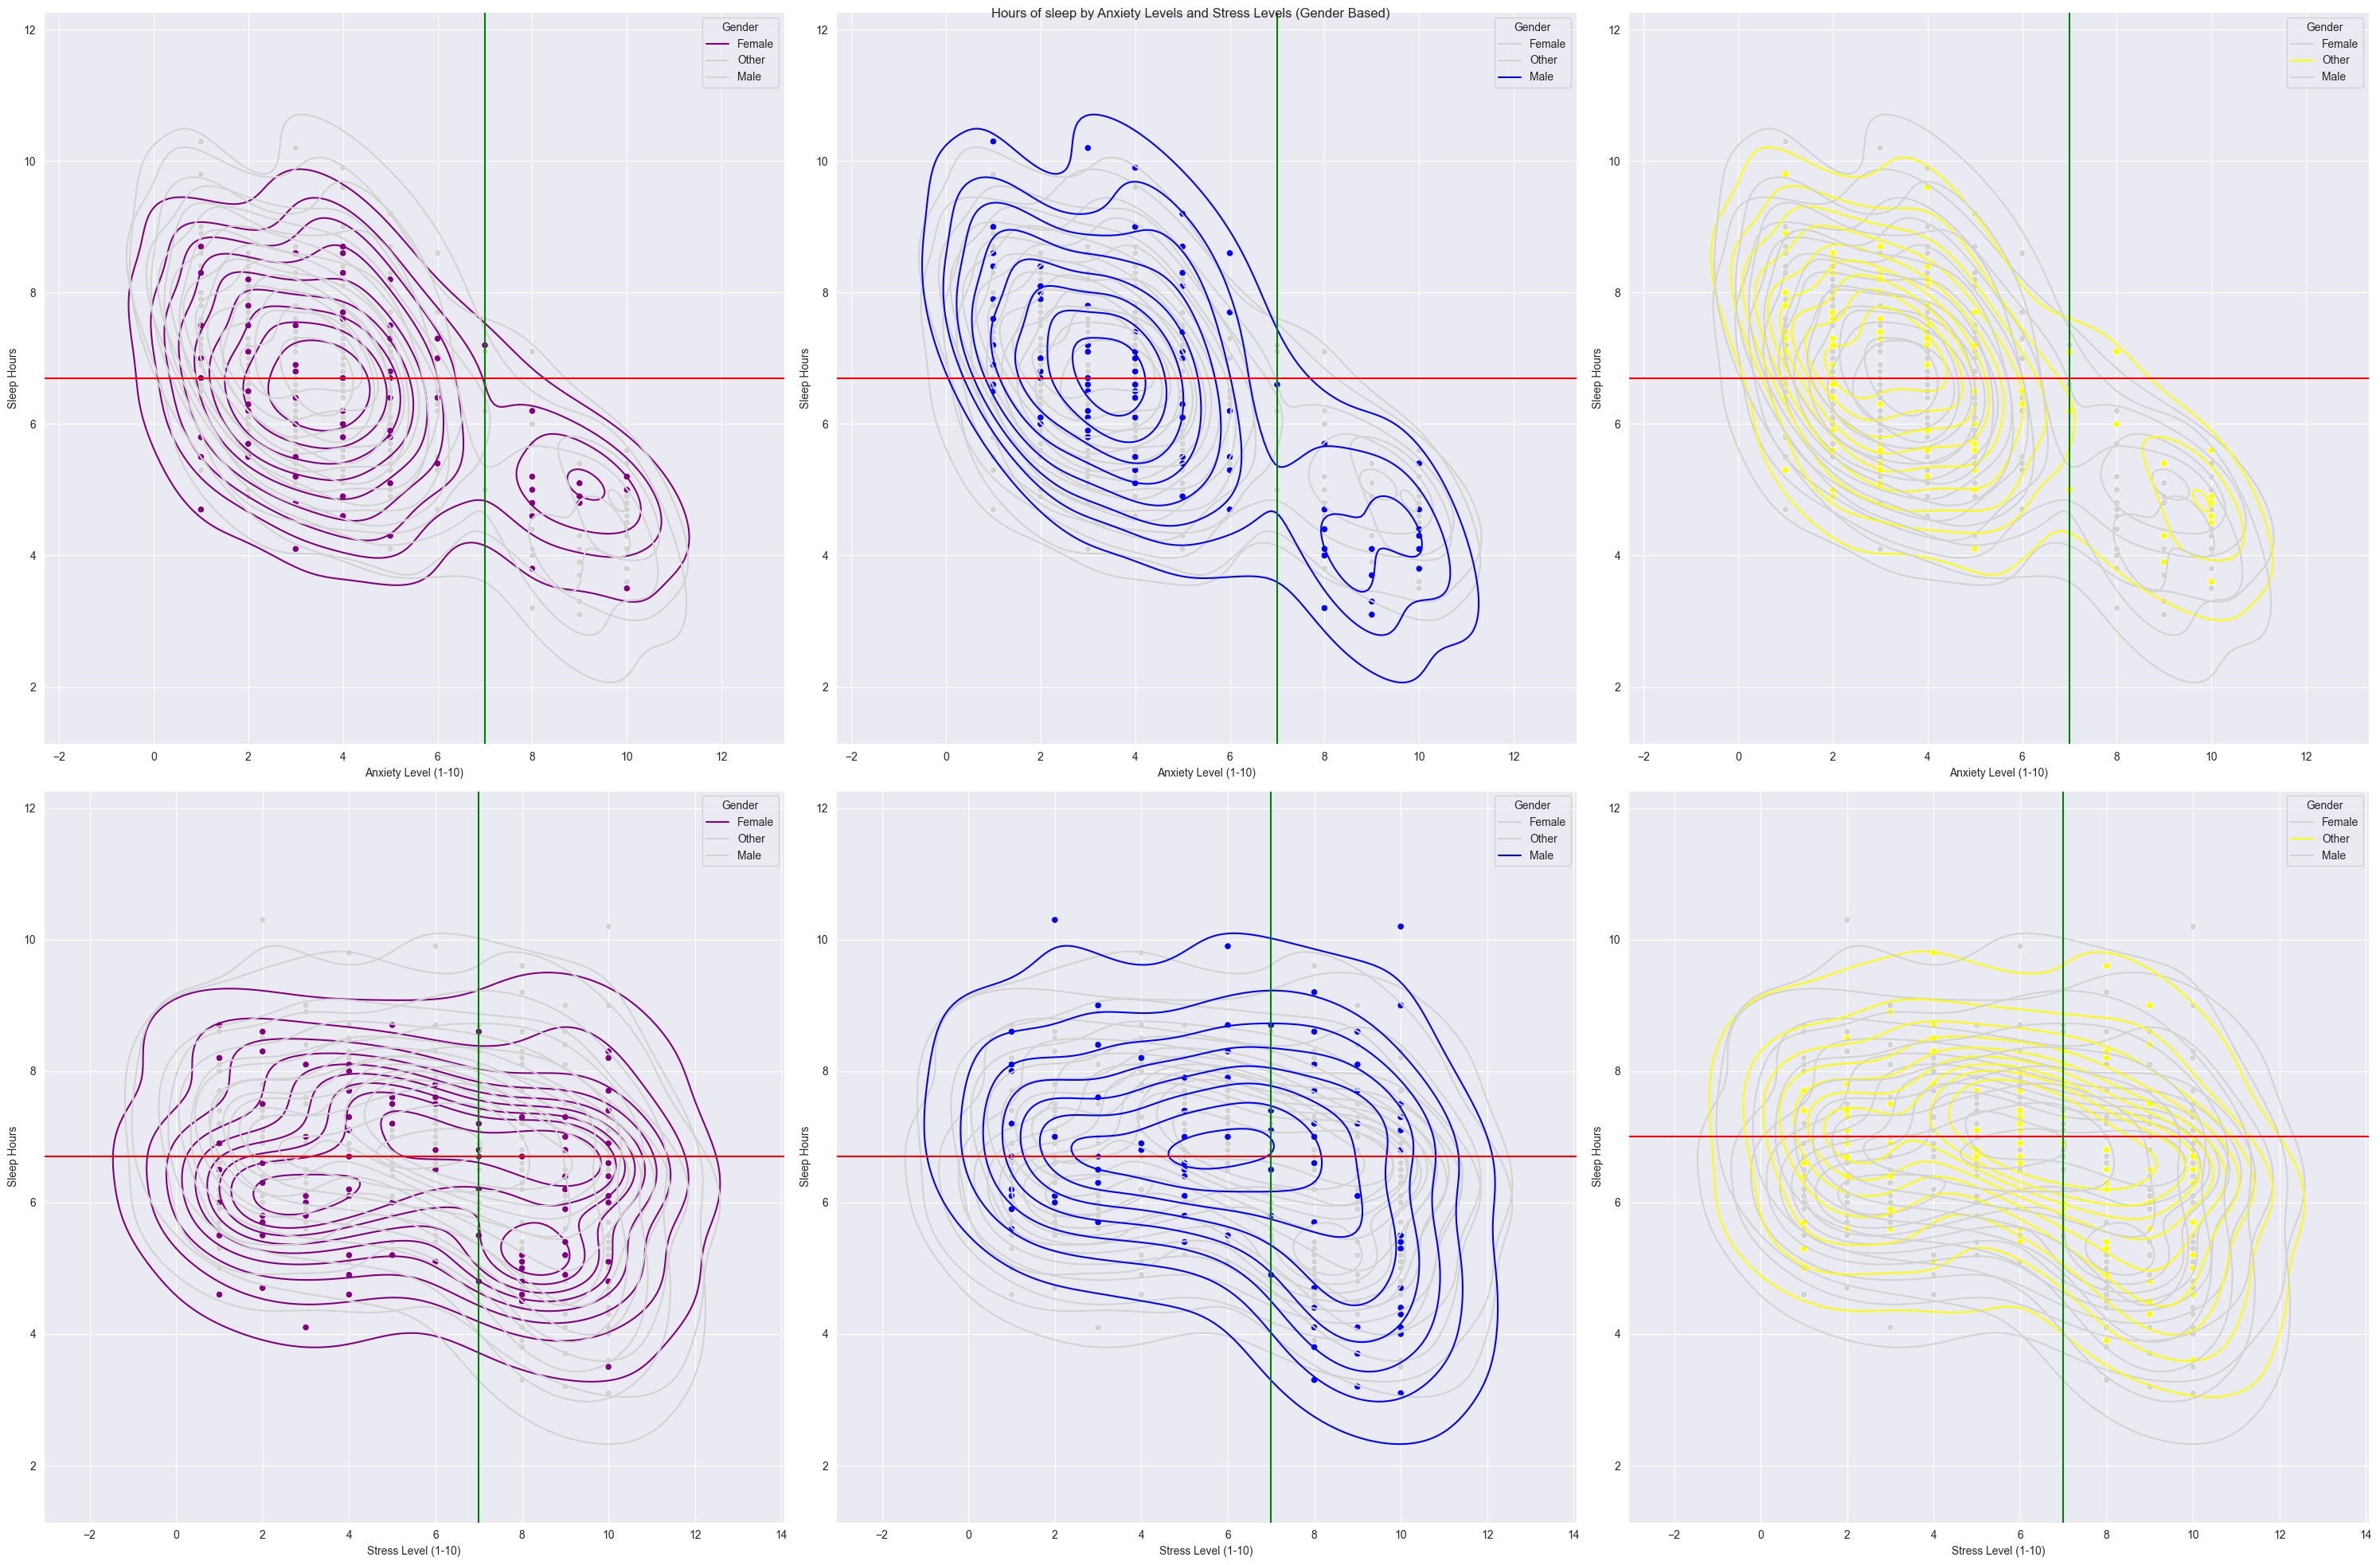

In [39]:
# plt.figure(figsize=(10, 10), tight_layout=True)
color_1 = {'Female': 'purple', 'Male': 'lightgrey', 'Other': 'lightgrey'}
color_2 = {'Female': 'lightgrey', 'Male': 'blue', 'Other': 'lightgrey'}
color_3 = {'Female': 'lightgrey', 'Male': 'lightgrey', 'Other': 'yellow'}

plt.figure(figsize=(30, 20), tight_layout=True)
plt.suptitle("Hours of sleep by Anxiety Levels and Stress Levels (Gender Based)")
plt.subplot(2, 3, 1)
sns.scatterplot(data = data_sample, x = 'Anxiety Level (1-10)', y = 'Sleep Hours', hue = 'Gender', palette = color_1)
sns.kdeplot(data = data_sample, x = 'Anxiety Level (1-10)', y = 'Sleep Hours', hue = 'Gender', palette = color_1)
plt.axhline(y = 6.7, color = "red")
plt.axvline(x = 7, color = "green")
plt.subplot(2, 3, 2)
sns.scatterplot(data = data_sample, x = 'Anxiety Level (1-10)', y = 'Sleep Hours', hue = 'Gender', palette = color_2)
sns.kdeplot(data = data_sample, x = 'Anxiety Level (1-10)', y = 'Sleep Hours', hue = 'Gender', palette = color_2)
plt.axhline(y = 6.7, color = "red")
plt.axvline(x = 7, color = "green")
plt.subplot(2, 3, 3)
sns.scatterplot(data = data_sample, x = 'Anxiety Level (1-10)', y = 'Sleep Hours', hue = 'Gender', palette = color_3)
sns.kdeplot(data = data_sample, x = 'Anxiety Level (1-10)', y = 'Sleep Hours', hue = 'Gender', palette = color_3)
plt.axhline(y = 6.7, color = "red")
plt.axvline(x = 7, color = "green")
plt.subplot(2, 3, 4)
sns.scatterplot(data = data_sample, x = 'Stress Level (1-10)', y = 'Sleep Hours', hue = 'Gender', palette = color_1)
sns.kdeplot(data = data_sample, x = 'Stress Level (1-10)', y = 'Sleep Hours', hue = 'Gender', palette = color_1)
# plt.axhline(y = 6.7, color = "red")
# plt.axvline(x = 7, color = "green")
plt.subplot(2, 3, 5)
sns.scatterplot(data = data_sample, x = 'Stress Level (1-10)', y = 'Sleep Hours', hue = 'Gender', palette = color_2)
sns.kdeplot(data = data_sample, x = 'Stress Level (1-10)', y = 'Sleep Hours', hue = 'Gender', palette = color_2)
# plt.axhline(y = 6.7, color = "red")
# plt.axvline(x = 7, color = "green")
plt.subplot(2, 3, 6)
sns.scatterplot(data = data_sample, x = 'Stress Level (1-10)', y = 'Sleep Hours', hue = 'Gender', palette = color_3)
sns.kdeplot(data = data_sample, x = 'Stress Level (1-10)', y = 'Sleep Hours', hue = 'Gender', palette = color_3)
# plt.axhline(y = 7, color = "red")
# plt.axvline(x = 7, color = "green")

plt.show() # Sample seems distributed evenly by age and gender.

Overall, we can see that when it comes to Anxiety and Stress, reported anxiety seems to be more problematic than stress when it comes to sleeping hours. Point density seems to pick up two distinct areas when it comes to anxiety,
a bigger area centered at reported Anxiety Level 3 and the average hours slept per group (6.7 h) - containing most of the points - and another area at stress level 7 and a smaller area to the side that reports much lower levels of sleep below the mean. This information matches with the dataset distribution seen in the samples and in the dataset.


Let's try to obtain the average statistics of people in both groups.

In [65]:
# data_sample.drop('> 7', inplace = True, axis = 1)
data_sample['>= 7'] = np.where(data_sample['Anxiety Level (1-10)'] >= 7, True , False)
data['>= 7'] = np.where(data['Anxiety Level (1-10)'] >= 7, True , False)

This aggregated information could be a result of sampling so let's get the full picture view by aggregating information coming from the original table.


In [68]:
data.groupby(['>= 7']).agg({'Sleep Hours': ['count', 'mean', 'std', 'median', 'min', 'max']})

Sleep Hours                                      
            count      mean       std median  min   max
>= 7                                                   
False        9863  6.866065  1.059598    6.9  2.9  11.3
True         1137  4.782410  0.972486    4.6  2.3   9.9

As we've seen with the analysis above, although fewer samples of reported Anxiety Level above 7 have been taken, significant differences in **sleep quality** and **caffeine daily intake** can be percieved between the two groups.
Let's view with a quick glance if there are any visible difference between the highest Anxiety Levels (>= 7) in the other categories.

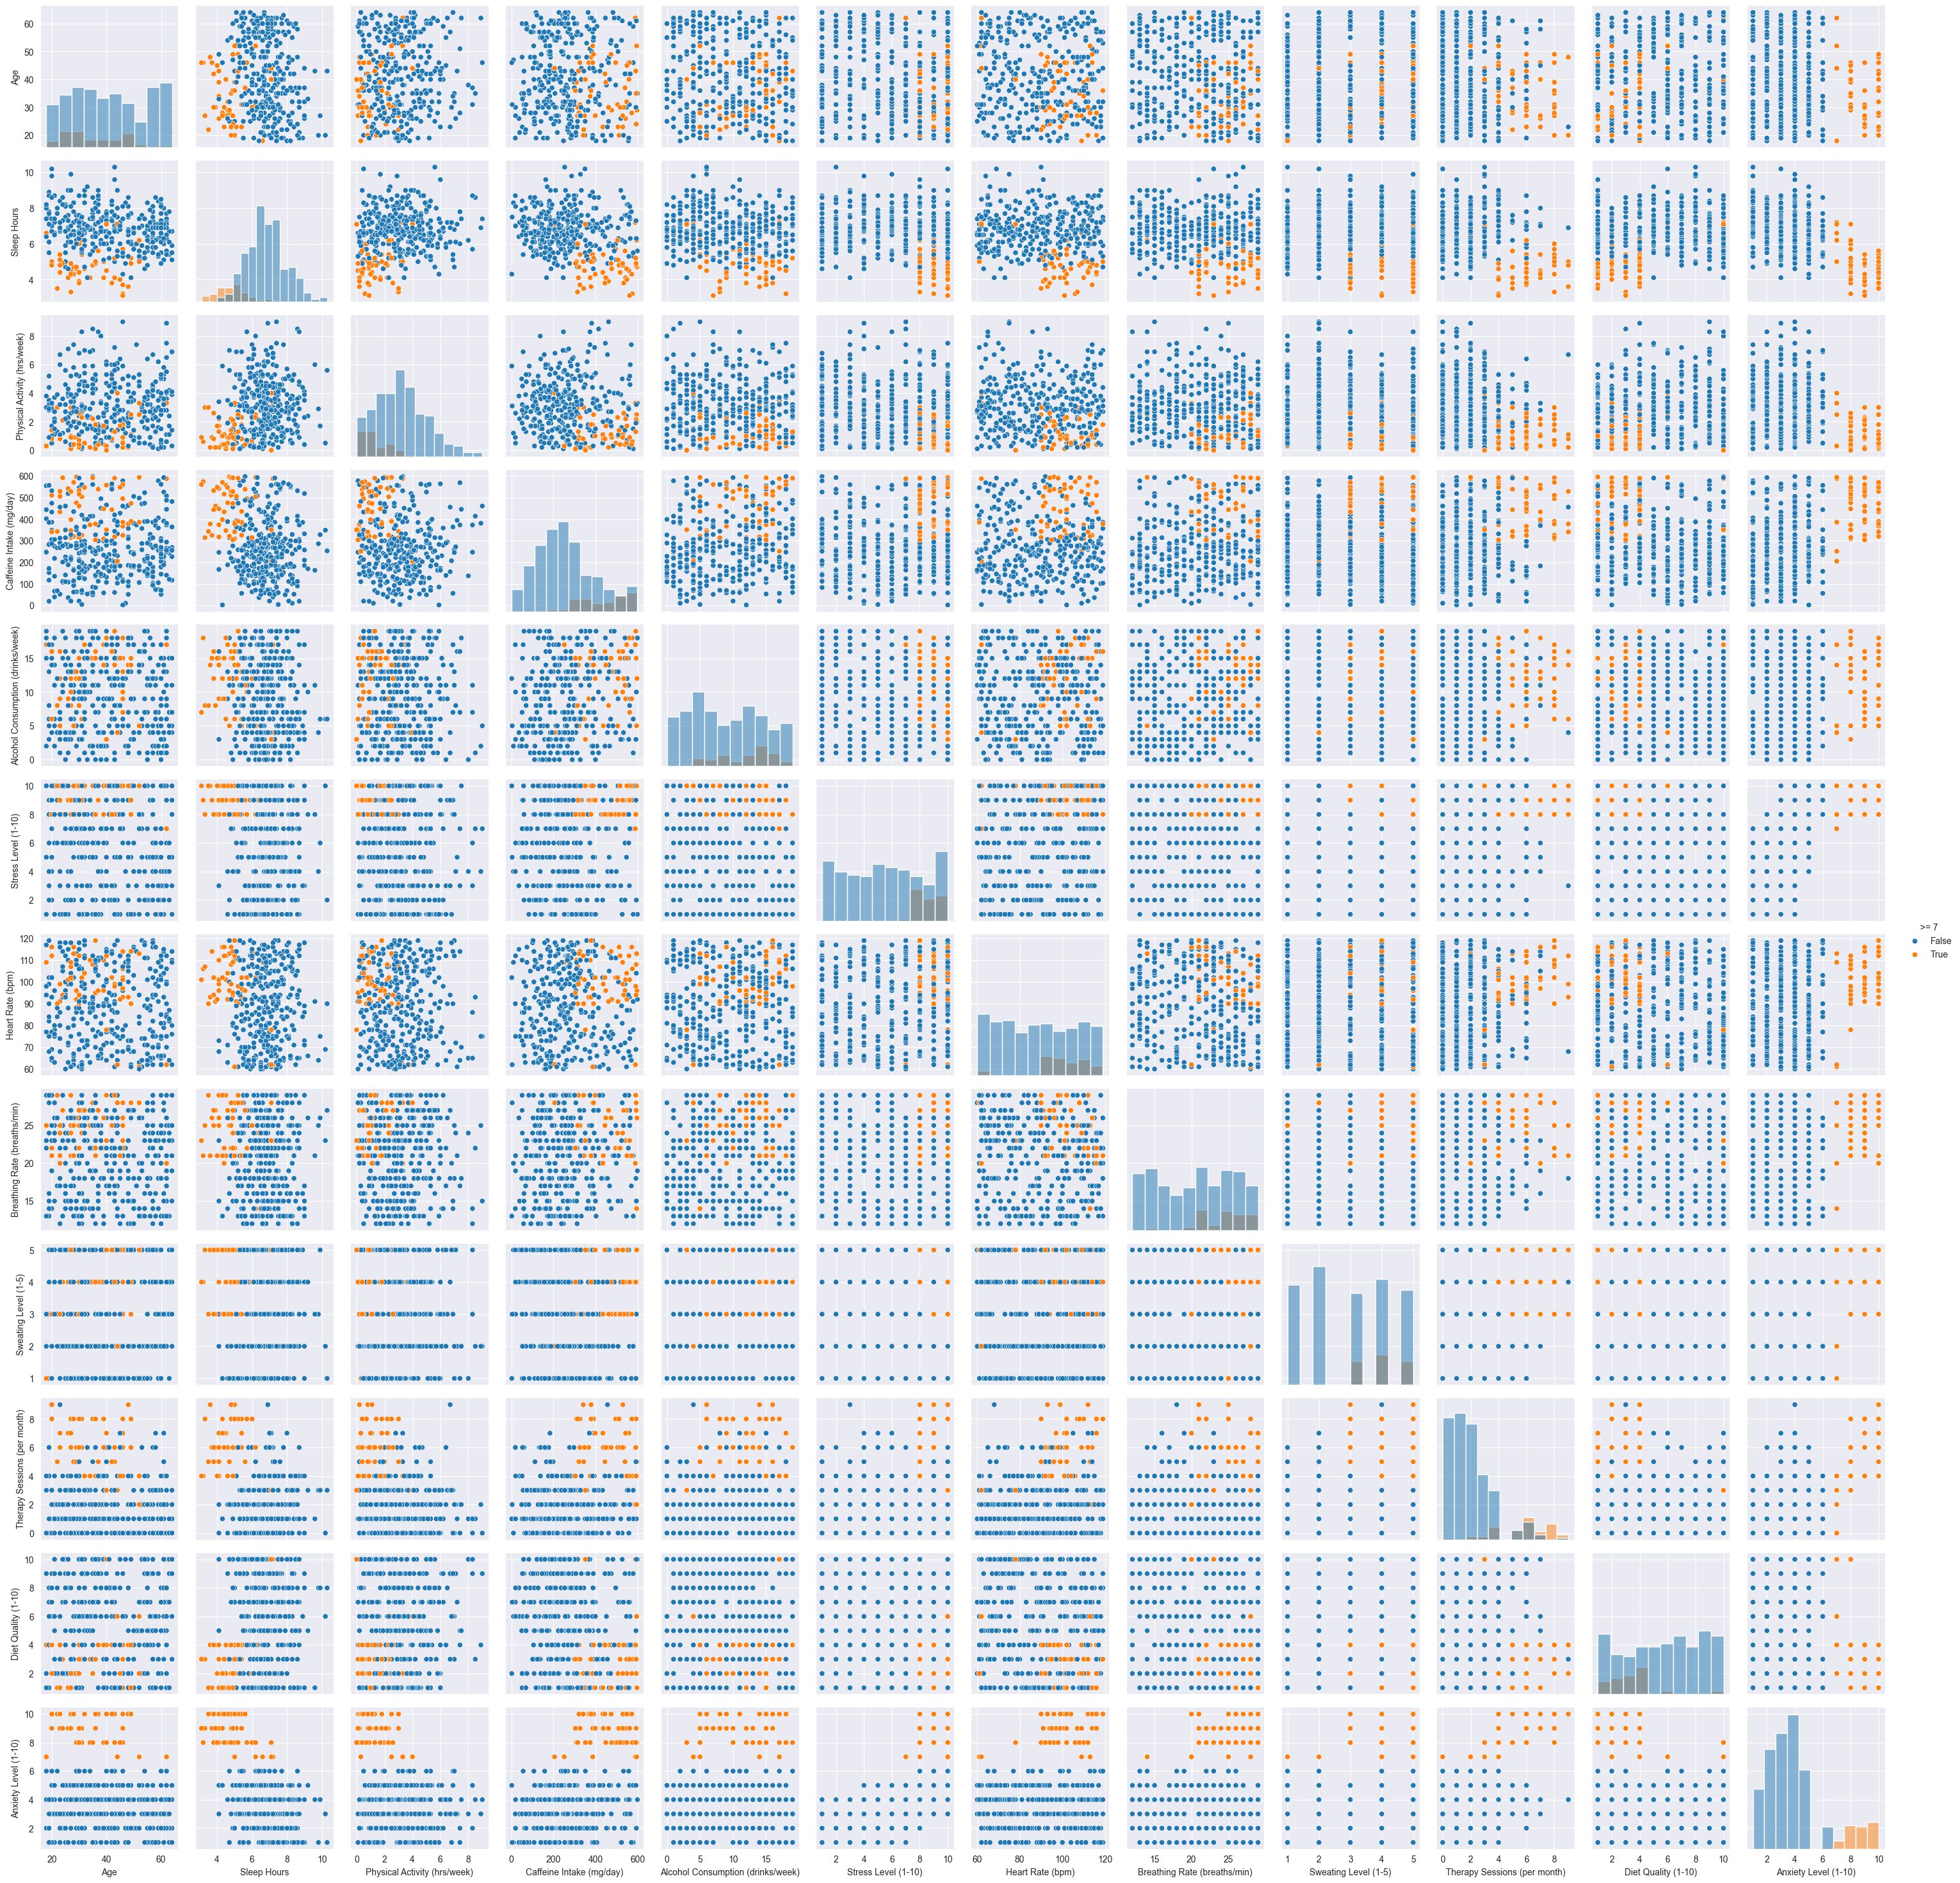

In [71]:
g = sns.PairGrid(data_sample, hue = '>= 7')
g.map_diag(sns.histplot)
g.map_lower(sns.scatterplot)
g.add_legend()
g.map_upper()
plt.show()

In the last row, it can be easily perceived that levels 7 and above are more closely related with certain variables as the points in the upper top part of the scatterplot are more closely together to one side of the graph.
In particular, it can be seen that higher levels of anxiety are more closely related with **lower sleep hours**, **lower physical activity**, **poorer diet quality** ,**larger caffeine intake**, **higher stress, heart and breathing rates**.

However, this information is not closely correlated as levels below 7 are widely distributed across the x-axis for all categories. This can be also seen in the table viewed in the table below.

In [ ]:
data_sample.groupby(['Anxiety Level (1-10)']).agg({'Age':'corr', 'Sleep Hours':'corr', 'Physical Activity (hrs/week)':'corr', 'Caffeine Intake (mg/day)':'corr', 'Alcohol Consumption (drinks/week)': 'corr', 'Stress Level (1-10)':'corr',
                                                   'Heart Rate (bpm)':'corr', })